In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import sys
sys.path.append('..')

In [2]:
from src.data.datasets_v2 import ClassImagesSet, MetaDataset

In [23]:
from src.data.dataset_managers_v2 import MetaDataLoader

In [7]:
train_classes = ClassImagesSet('/home/oscarli/projects/meta-analysis-classification/data/new_miniimagenet/base.json',
                               preload=True)

loading image paths, labels from json  /home/oscarli/projects/meta-analysis-classification/data/new_miniimagenet/base.json
Attempt loading class 0 into memory
Done loading class 0 into memory -- found 600 images
Attempt loading class 1 into memory
Done loading class 1 into memory -- found 600 images
Attempt loading class 2 into memory
Done loading class 2 into memory -- found 600 images
Attempt loading class 3 into memory
Done loading class 3 into memory -- found 600 images
Attempt loading class 4 into memory
Done loading class 4 into memory -- found 600 images
Attempt loading class 5 into memory
Done loading class 5 into memory -- found 600 images
Attempt loading class 6 into memory
Done loading class 6 into memory -- found 600 images
Attempt loading class 7 into memory
Done loading class 7 into memory -- found 600 images
Attempt loading class 8 into memory
Done loading class 8 into memory -- found 600 images
Attempt loading class 9 into memory
Done loading class 9 into memory -- foun

In [5]:
for cl in train_classes.items():
    print(cl)

(0, <src.data.datasets_v2.ClassImages object at 0x7f81f0f13dd0>)
(1, <src.data.datasets_v2.ClassImages object at 0x7f81f06e5d10>)
(2, <src.data.datasets_v2.ClassImages object at 0x7f8267483a10>)
(3, <src.data.datasets_v2.ClassImages object at 0x7f81f0681e90>)
(4, <src.data.datasets_v2.ClassImages object at 0x7f81f0526190>)
(5, <src.data.datasets_v2.ClassImages object at 0x7f81f0472f10>)
(6, <src.data.datasets_v2.ClassImages object at 0x7f81f04a1e10>)
(7, <src.data.datasets_v2.ClassImages object at 0x7f81f012bcd0>)
(8, <src.data.datasets_v2.ClassImages object at 0x7f81f0400810>)
(9, <src.data.datasets_v2.ClassImages object at 0x7f81f11a1fd0>)
(10, <src.data.datasets_v2.ClassImages object at 0x7f81f0629f10>)
(11, <src.data.datasets_v2.ClassImages object at 0x7f81f0475050>)
(12, <src.data.datasets_v2.ClassImages object at 0x7f81ee706b50>)
(13, <src.data.datasets_v2.ClassImages object at 0x7f81ee4455d0>)
(14, <src.data.datasets_v2.ClassImages object at 0x7f81ee5ed110>)
(15, <src.data.datas

In [9]:
train_meta_dataset = MetaDataset(
                        dataset_name='miniImagenet', 
                        support_class_images_set=train_classes,
                        query_class_images_set=train_classes,
                        image_size=84,
                        support_aug=True, query_aug=True,
                        fix_support=5, save_folder='.', 
                        fix_support_path='./fixed_support_pool.pkl')

No. of classes in set support 64                 query 64
Support set is fixed: True
Size of fixed support: 5
support aug: True query aug: True
Using MI specific augmentation strategy
Using MI specific augmentation strategy
Setting support loader for class 0 using 5 images from class
Setting support loader for class 1 using 5 images from class
Setting support loader for class 2 using 5 images from class
Setting support loader for class 3 using 5 images from class
Setting support loader for class 4 using 5 images from class
Setting support loader for class 5 using 5 images from class
Setting support loader for class 6 using 5 images from class
Setting support loader for class 7 using 5 images from class
Setting support loader for class 8 using 5 images from class
Setting support loader for class 9 using 5 images from class
Setting support loader for class 10 using 5 images from class
Setting support loader for class 11 using 5 images from class
Setting support loader for class 12 using 

In [10]:
train_meta_dataset.support_sub_dataloader[0].cl

0

In [12]:
task_class_info = {
    'task_idx': 2,
    'cl': 62,
    'n_shot': 5,
    'n_query': 16,
    'cl_label': 3,
}
train_meta_dataset[task_class_info].keys()

dict_keys(['task_idx', 'cl', 'support_x_cl', 'support_y_cl', 'query_x_cl', 'query_y_cl'])

In [13]:
print(train_meta_dataset[task_class_info]['task_idx'])
print(train_meta_dataset[task_class_info]['cl'])
print(train_meta_dataset[task_class_info]['support_x_cl'].shape)
print(train_meta_dataset[task_class_info]['support_y_cl'].shape)
print(train_meta_dataset[task_class_info]['query_x_cl'].shape)
print(train_meta_dataset[task_class_info]['query_y_cl'].shape)
print(train_meta_dataset[task_class_info]['support_y_cl'])
print(train_meta_dataset[task_class_info]['query_y_cl'])

2
62
torch.Size([5, 3, 84, 84])
torch.Size([5])
torch.Size([16, 3, 84, 84])
torch.Size([16])
tensor([3, 3, 3, 3, 3])
tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])


In [14]:
def chw2hwc(img):
    return np.transpose(a=img, axes=(1,2,0))

In [18]:
import numpy as np
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


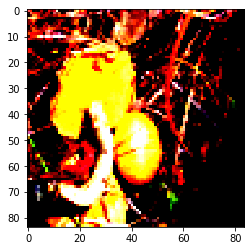

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


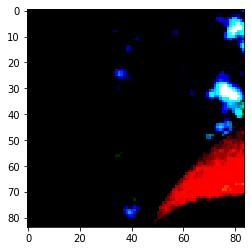

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


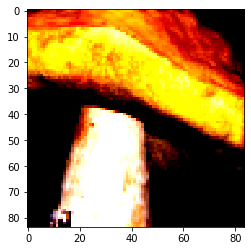

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


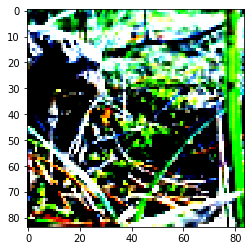

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


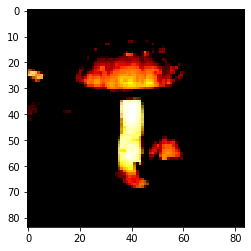

In [19]:
support = train_meta_dataset[task_class_info]['support_x_cl']
for i in range(5):
    plt.imshow(chw2hwc(support[i].numpy()))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


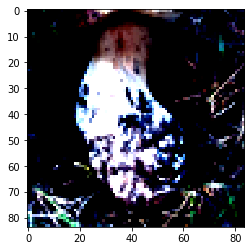

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


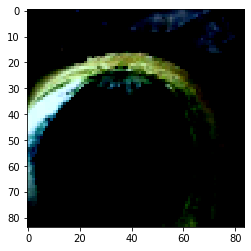

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


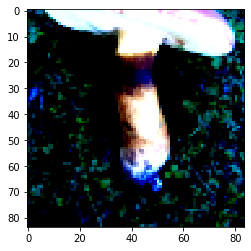

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


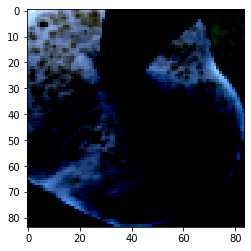

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


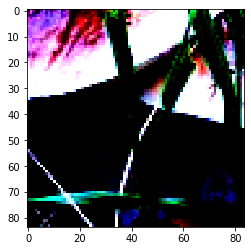

In [20]:
support = train_meta_dataset[task_class_info]['query_x_cl']
for i in range(5):
    plt.imshow(chw2hwc(support[i].numpy()))
    plt.show()

In [26]:
train_loader = MetaDataLoader(
                    dataset=train_meta_dataset,
                    n_batches=200,
                    batch_size=4,
                    n_way=5,
                    n_shot=0,
                    n_query=15,
                    randomize_query=True)

Size of Support: 0
Size of Query: 15 randomize query True
Setting an episodic sampler over classes
(0, 0.015625)
(1, 0.015625)
(2, 0.015625)
(3, 0.015625)
(4, 0.015625)
(5, 0.015625)
(6, 0.015625)
(7, 0.015625)
(8, 0.015625)
(9, 0.015625)
(10, 0.015625)
(11, 0.015625)
(12, 0.015625)
(13, 0.015625)
(14, 0.015625)
(15, 0.015625)
(16, 0.015625)
(17, 0.015625)
(18, 0.015625)
(19, 0.015625)
(20, 0.015625)
(21, 0.015625)
(22, 0.015625)
(23, 0.015625)
(24, 0.015625)
(25, 0.015625)
(26, 0.015625)
(27, 0.015625)
(28, 0.015625)
(29, 0.015625)
(30, 0.015625)
(31, 0.015625)
(32, 0.015625)
(33, 0.015625)
(34, 0.015625)
(35, 0.015625)
(36, 0.015625)
(37, 0.015625)
(38, 0.015625)
(39, 0.015625)
(40, 0.015625)
(41, 0.015625)
(42, 0.015625)
(43, 0.015625)
(44, 0.015625)
(45, 0.015625)
(46, 0.015625)
(47, 0.015625)
(48, 0.015625)
(49, 0.015625)
(50, 0.015625)
(51, 0.015625)
(52, 0.015625)
(53, 0.015625)
(54, 0.015625)
(55, 0.015625)
(56, 0.015625)
(57, 0.015625)
(58, 0.015625)
(59, 0.015625)
(60, 0.0156

In [27]:
for data in train_loader:
    break

In [28]:
type(data)
len(data)

2

In [29]:
data[0].shape

torch.Size([4, 75, 3, 84, 84])

In [30]:
data[1] # support labels

tensor([[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
         3, 3, 3],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4,
         4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
         3, 3, 3],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [31]:
import time
from tqdm import tqdm

In [32]:
time_points = [time.time()]
for i, data in enumerate(train_loader):
    time_points.append(time.time())

In [33]:
import matplotlib.pyplot as plt

In [34]:
import numpy as np

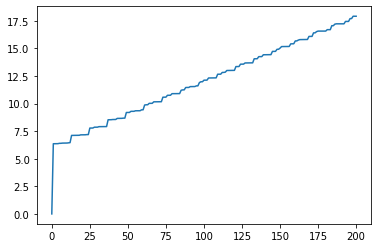

In [35]:
plt.plot(list(range(len(time_points))), np.array(time_points) - time_points[0])

In [36]:
(time_points[200] - time_points[25]) / (200 - 25)

0.05794518334524972

In [47]:
data[1].shape

torch.Size([20, 20])

In [14]:
i[0].shape

torch.Size([10, 20, 3, 84, 84])

In [48]:
a = {1:[2]}

In [50]:
for i in a:
    print(i)

1
